<a href="https://colab.research.google.com/github/Vinayak-2003/OIBSIP_Car-Price-prediction-using-Machine-Learning/blob/main/Car_Price_prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price prediction using Machine Learning

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data collection ans processing

In [2]:
car_data = pd.read_csv("/content/car data.csv")

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(car_data.shape)

(301, 9)


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking the categorical values
print(car_data.Fuel_Type.value_counts())
print(car_data.Selling_type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the categorical data

In [8]:
#encoding the "Fuel_type" data
car_data.replace({"Fuel_Type":{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

#encoding the "Selling_type" data
car_data.replace({"Selling_type":{'Dealer':0, 'Individual':1}}, inplace=True)

#encoding the "Transmission" data
car_data.replace({"Transmission":{'Manual':0, 'Automatic':1}},inplace=True)

In [9]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the Data and target

In [10]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [11]:
y = car_data['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Splitting training and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

### Model Training



### 1.   Linear Regression




In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [14]:
#Prediction on training data
training_data_predict = lin_reg.predict(X_train)

In [15]:
#R squared error for training data
lin_error_score = metrics.r2_score(y_train, training_data_predict)
print("R^2 Error for Linear Regression is: ", lin_error_score)

R^2 Error for Linear Regression is:  0.8796483009370215


Visualize the actual prices and predicted prices

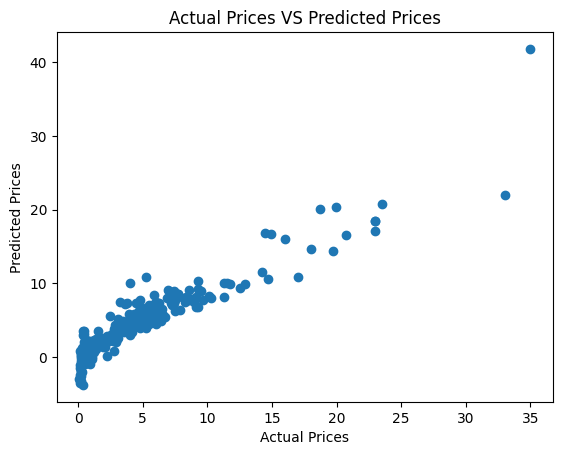

In [16]:
plt.scatter(y_train, training_data_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

From the above plot we can observe the accuracy of our model by simply analysing the dots of how close they are.

In [17]:
#Prediction on test data
test_data_predict = lin_reg.predict(X_test)

In [18]:
#R squared error for test data
lin_testData_score = metrics.r2_score(y_test, test_data_predict)
print("R squared score for test data: ", lin_testData_score)

R squared score for test data:  0.8365861023210703


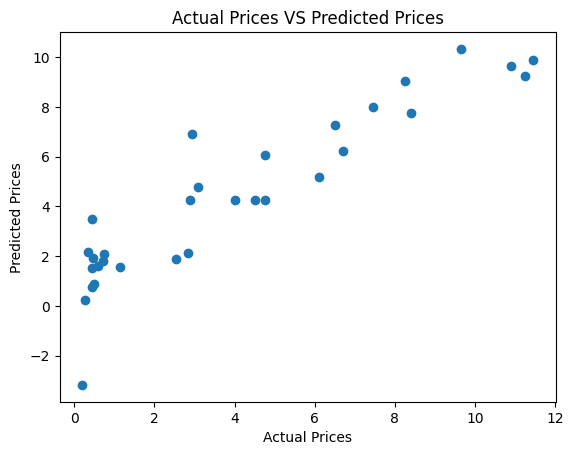

In [19]:
plt.scatter(y_test, test_data_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()




### 2.   Lasso Regression



In [20]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

Model evaluation

In [21]:
#Prediction on training data
lasso_prediction = lasso_reg.predict(X_train)

In [22]:
#R Squared error
lasso_train_score = metrics.r2_score(y_train, lasso_prediction)
print("R squared error for Lasso Regression: ", lasso_train_score)

R squared error for Lasso Regression:  0.8424480718240743


Visualize the actual prices and predicted prices

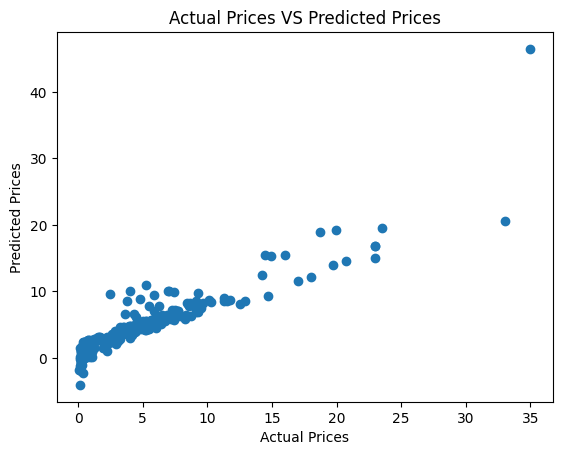

In [23]:
plt.scatter(y_train, lasso_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [24]:
lasso_test_predict = lasso_reg.predict(X_test)

In [25]:
#R squared value
lasso_test_score = metrics.r2_score(y_test, lasso_test_predict)
print("R squared value for test data: ", lasso_test_score)

R squared value for test data:  0.8709763132343395


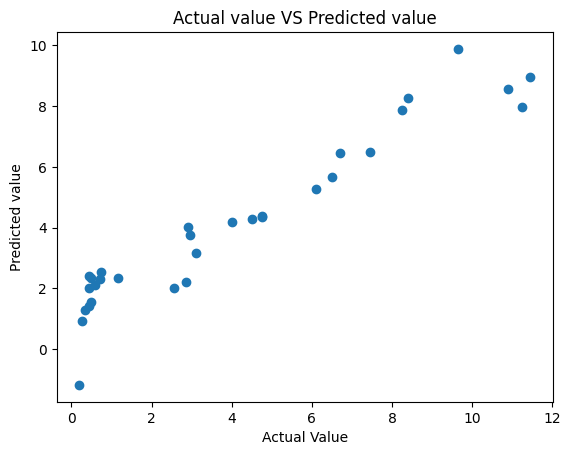

In [26]:
plt.scatter(y_test, lasso_test_predict)
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")
plt.title("Actual value VS Predicted value")
plt.show()

### Therefore, from the above two machine learning model we have proved that Lasso Regression is working good because the R square value of Lasso Regression on training data is less than that of Linear Regression.